#  **This notebook has Twitter-Specific Preprocessing and **

**We perform our proposed twitter specific preprocessing techniques and run it on our classical ML models as described in our report**

In [2]:
import numpy as np
import pandas as pd

In [3]:
train=pd.read_csv("waseempreprocessed _train.csv.csv")

In [4]:
train.isna().sum()

Unnamed: 0    0
text          1
label         0
dtype: int64

In [5]:
test=pd.read_csv("waseempreprocessed_test.csv")

In [6]:
test.isna().sum()

Unnamed: 0    0
text          2
label         0
dtype: int64

Very small number of missing values therefore I remove them

In [7]:
train.dropna(inplace=True)
test.dropna(inplace=True)


In [10]:
train["text"] = train["text"].astype('string')
test["text"] = test["text"].astype('string')

In [11]:
train.shape

(14013, 3)

In [12]:
test.shape

(1570, 3)

Deleting duplicate tweets

In [ ]:
pip install emoji

In [ ]:
pip install nltk

In [15]:
from emoji import demojize
#to extract emoji from text

from nltk.tokenize import TweetTokenizer
#TweetTokenizer is specific for tweets, it keeps hashtags intact while word_tokenize doesn't

tokenizer = TweetTokenizer()
#Creating a reference variable for the TweetTokenizer class.

In [16]:
"""Function to normalize the users and links to @USER and HTTPURL respectively"""

def normalizeToken(token):
    lowercased_token = token.lower()
    if token.startswith("@"):
        return "@USER"
    elif lowercased_token.startswith("http") or lowercased_token.startswith("www"):
        return "HTTPURL"
    elif len(token) == 1:
        return demojize(token)
    else:
        return token

In [17]:
""" Function to Normalize tweet into standard English"""
def normalizeTweet(tweet):
    tokens = tokenizer.tokenize(tweet)
    
    normTweet = " ".join([normalizeToken(token) for token in tokens])

    normTweet = (
        normTweet.replace("cannot ", "can not ")
        .replace("shouldn't", "should not")
        .replace("wont", "will not")
        .replace("can't", "can not")
        .replace("ain't", "am not")
        .replace("wasn’t", "was not")
        .replace("weren’t", "were not")
        .replace("won't", "will not")
        .replace("wouldn’t", "would not")
        .replace("shan't", "shall not")
        .replace("musn't", "must not")
        .replace("didnt", "did not")
        .replace("shouldnt", "should not")
        .replace("cant", "can not")
        .replace("aint", "am not")
        .replace("wasnt", "was not")
        .replace("werent", "were not")
        .replace("wouldnt", "would not")
        .replace("shant", "shall not")
        .replace("musnt", "must not")
        .replace("didnt", "did not")
    
    )
    
    return " ".join(normTweet.split())



In [18]:
train.dtypes

Unnamed: 0     int64
text          string
label          int64
dtype: object

In [19]:
train['normalized_tweet']= train['text'].apply(lambda x:  normalizeTweet(x))


In [20]:
test['normalized_tweet']= test['text'].apply(lambda x:  normalizeTweet(x))


In [21]:
#lowercasing
for i in range(len(train)):
    Tweet = train['normalized_tweet'].iloc[i]
    train.at[i,'normalized_tweet'] = Tweet.lower()

#lowercasing
for i in range(len(test)):
    Tweet = test['normalized_tweet'].iloc[i]
    test.at[i,'normalized_tweet'] = Tweet.lower()

In [22]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


/opt/homebrew/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


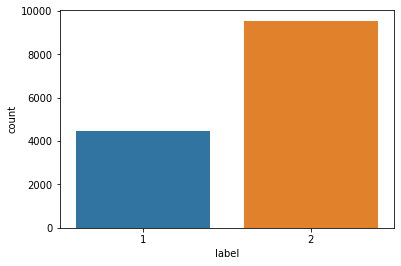

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot('label',data=train,ax=ax)
plt.show()

class is heavily imbalanced

### Visualizing the Model

In [ ]:
pip install wordcloud

In [24]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

In [25]:
pre_1 =train[train['label']==1]['text']
pre_2 = train[train['label']==2]['text']

label 1 are racist tweets
label 2 are sexist tweets

In [26]:
all_headlines1 = ' '.join(pre_1.str.lower())

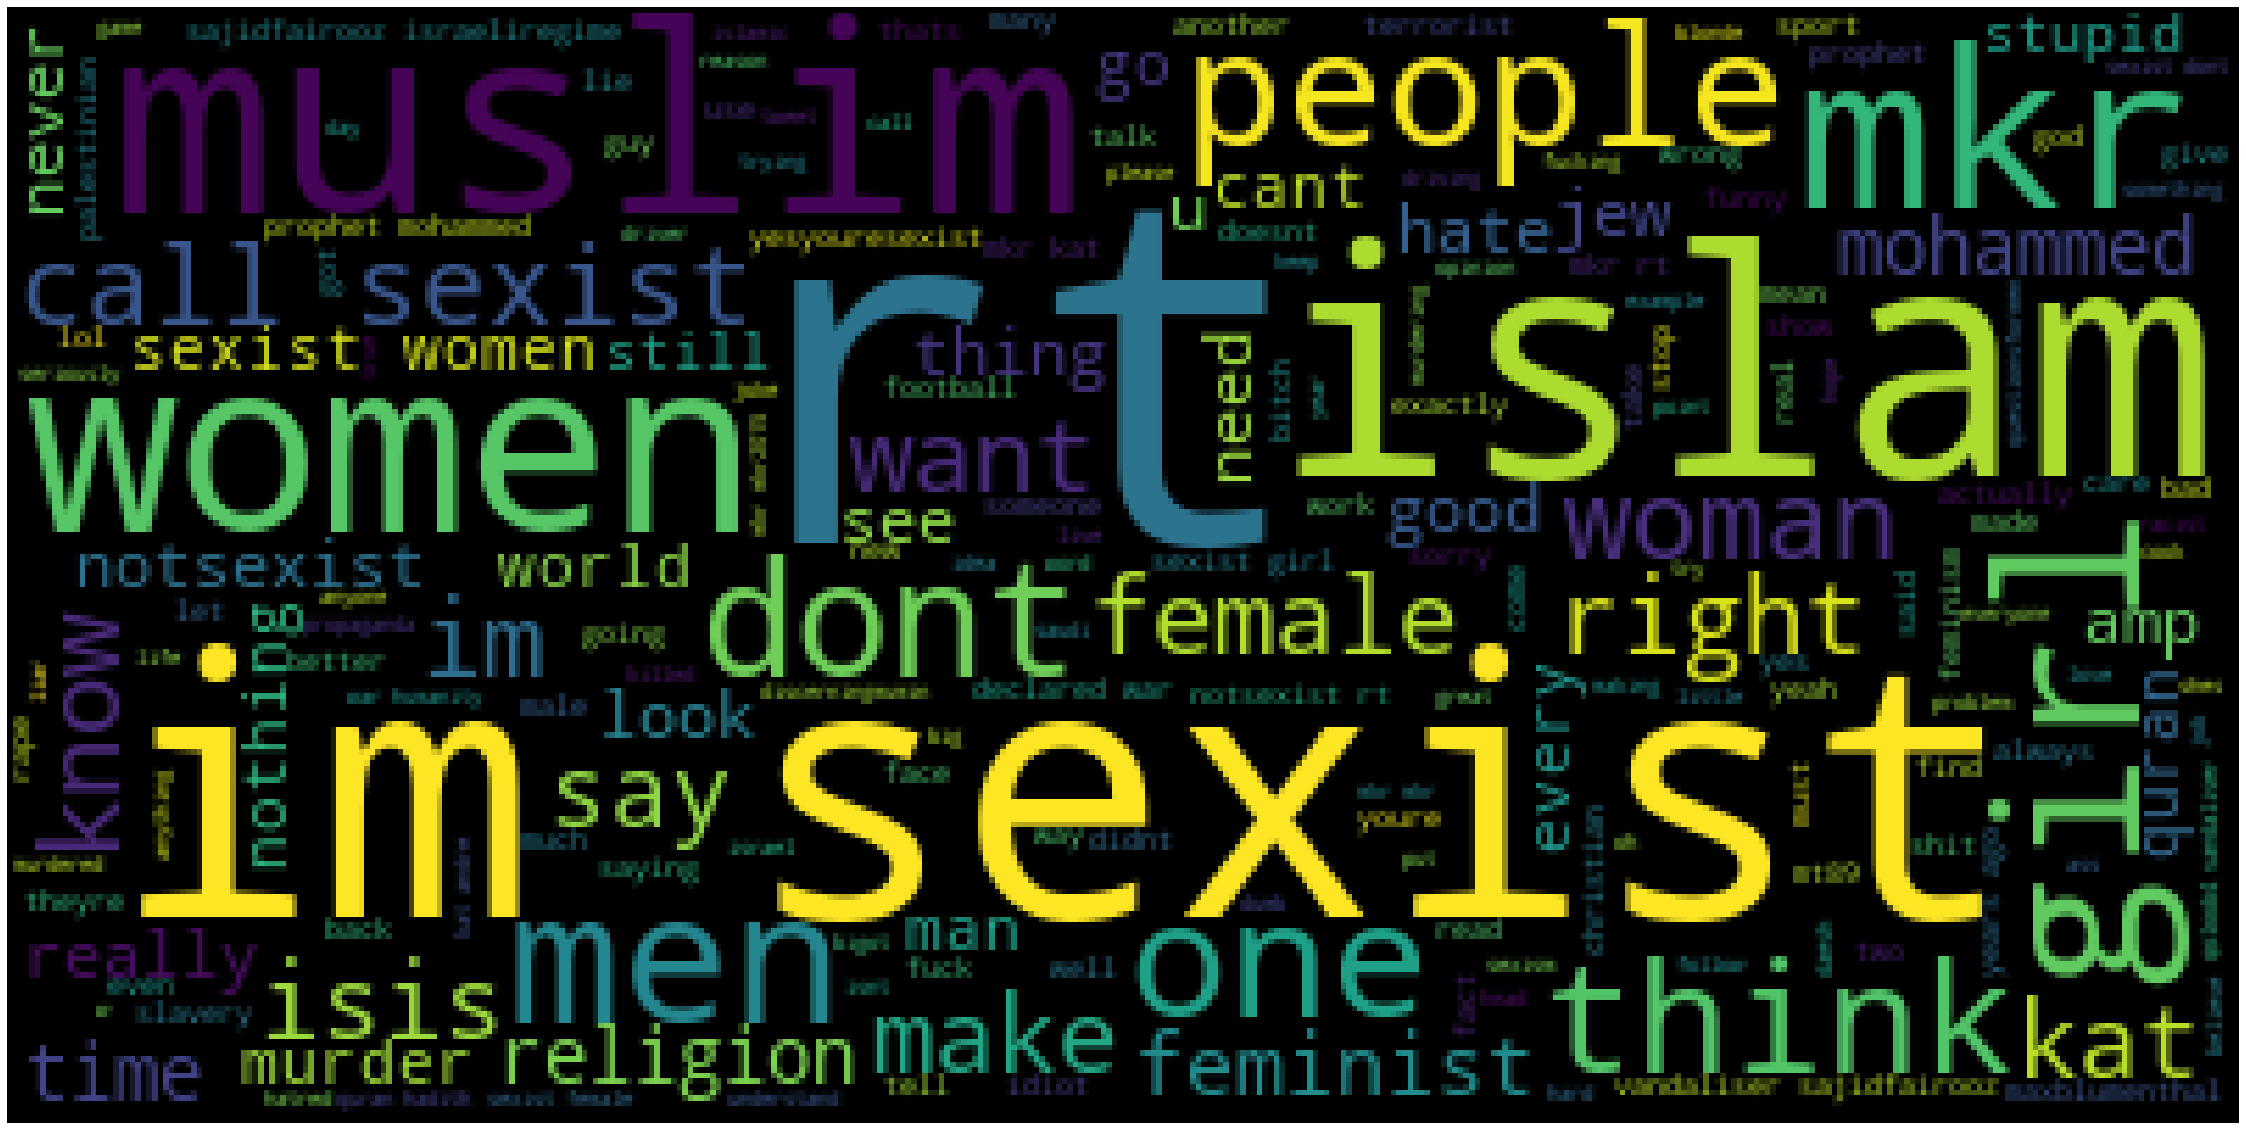

In [30]:
wordcloud = WordCloud().generate(all_headlines1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

rcParams['figure.figsize'] = 40, 40
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Racist tweets were mostly targetting islam and muslims in that specified timeframe

In [28]:
all_headlines2 = ' '.join(pre_2.str.lower())

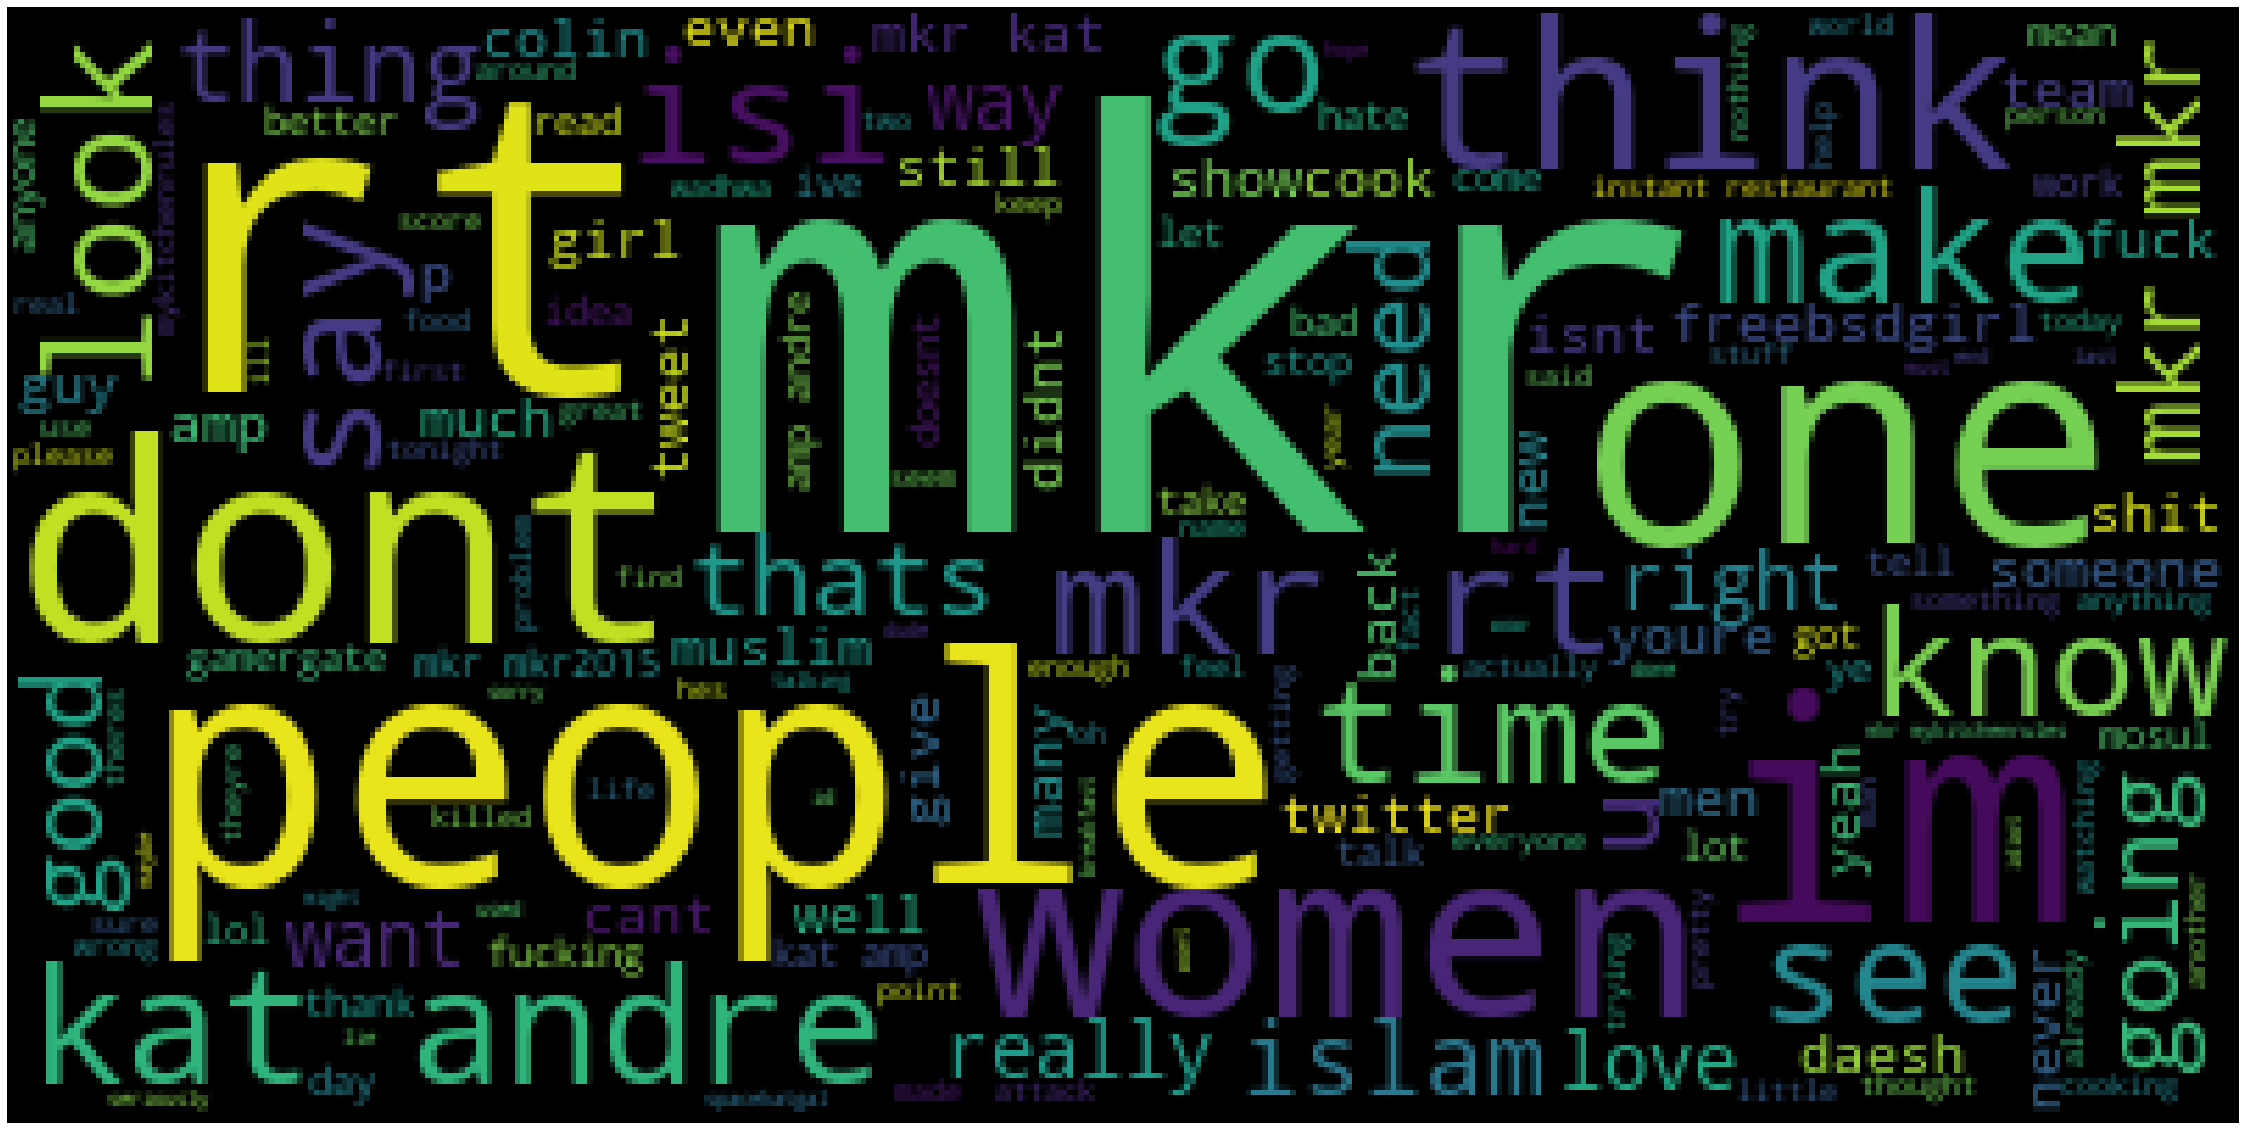

In [29]:
wordcloud = WordCloud().generate(all_headlines2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

rcParams['figure.figsize'] = 40, 40
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Sexist tweets were mostly towards the show MKR

In [31]:
train['label'].value_counts()

2    9559
1    4454
Name: label, dtype: int64

We cannot apply SMOTE techniques to text data because SMOTE works in feature space. 
It means that the output of SMOTE is not a synthetic data which 
is a real representative of a text inside its feature space.

label 1 is just 50% of label 2.Therefore in our case Random oversampling can lead to overfitting.RandomUnderSampling could lead to underfitting

## Combining Both UnderSampling and Oversampling

To improve the bias towards these cases, a small amount of oversampling can be applied to the minority class, while a small amount of undersampling can be applied to the majority class to minimize the bias on that class.

In [ ]:
pip install -U imbalanced-learn

In [32]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [33]:
X=train.drop('label',axis=1)
y=train['label'].values

In [35]:

# defining oversampling strategy
over = RandomOverSampler(sampling_strategy="not majority")

X, y = over.fit_resample(X, y)
# defining undersampling strategy
under = RandomUnderSampler(sampling_strategy="not minority")

X, y = under.fit_resample(X,y)
# the number of samples will be equalized

In [36]:
X.shape

(8008, 3)

In [37]:
y.shape

(8008,)

In [38]:
a= np.array(y)
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{1: 4004, 2: 4004}

## Applying text vectorization

### TFIDF

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,3), stop_words="english",max_features=10000)
tfidf_train = tfidf_vect.fit_transform(X['normalized_tweet'])
tfidf_test = tfidf_vect.transform(test['normalized_tweet'].apply(lambda x: np.str_(x)))


In [41]:
tfidf_train.shape

(8008, 10000)

In [43]:
tfidf_test.shape

(1572, 10000)

### Model Running

In [55]:
Y_test=test['label']

In [45]:
from sklearn.metrics import precision_recall_fscore_support


### Naive bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB() 
clf.fit(tfidf_train, y)                       # Fit Naive Bayes classifier according to X, y
pred = clf.predict(tfidf_test)                     # Perform classification on an array of test vectors X.

precision_recall_fscore_support(Y_test, pred)

(0.802547770700637, 0.802547770700637, 0.802547770700637, None)

### sgd

In [60]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(tfidf_train, y)
pred_sgd = sgd.predict(tfidf_test)



In [61]:
precision_recall_fscore_support(Y_test, pred_sgd)

(0.8286624203821656, 0.8286624203821656, 0.8286624203821656, None)

### Passive Aggresive Classifer

In [67]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
pa.fit(tfidf_train, y)
papred=pa.predict(tfidf_test)

In [68]:
precision_recall_fscore_support(Y_test, papred)

(0.7713375796178344, 0.7713375796178344, 0.7713375796178344, None)

lightgbm , catboost , bertTweet on Kaggle Notebook